# HR Analytics Project

## Data Description
Human Resources are critical resources of any organization. Organizations spend huge amount of time and money to hire
and nurture their employees. It is a huge loss for companies if employees leave, especially the key resources.
So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition
risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the
impact to orgranization.

Import required libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [3]:
df=pd.read_csv('HR.csv.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data has been imported and we can see the first 5 rows of the data using df.head() function

In [4]:
df.shape

(1470, 35)

This is the shape of data

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

These are the datatypes of each columns which includes integer and object values 

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

These are the columns of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The data does not have null values

In [9]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In Total YearsAtCompany,DistanceFromHome,TotalWorkingYears mean is higher than median.

Standard deviation is higher in  DailyRate,DistanaceFromHOme,EmployeeNumber columns.

In few columns there is a huge difference between 75th percentile and max column which means there are oultiers.

In [10]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

This column only has two data- yes, no

In [11]:
df.StandardHours.unique()

array([80], dtype=int64)

In [12]:
df.EmployeeCount.unique()

array([1], dtype=int64)

In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Attrition"]=LE.fit_transform(df["Attrition"])

In [14]:
LE=LabelEncoder()
df["Gender"]=LE.fit_transform(df["Gender"])

In [15]:
LE=LabelEncoder()
df["BusinessTravel"]=LE.fit_transform(df["BusinessTravel"])

In [16]:
LE=LabelEncoder()
df["Department"]=LE.fit_transform(df["Department"])

In [17]:
LE=LabelEncoder()
df["EducationField"]=LE.fit_transform(df["EducationField"])

In [18]:
LE=LabelEncoder()
df["JobRole"]=LE.fit_transform(df["JobRole"])

In [19]:
LE=LabelEncoder()
df["MaritalStatus"]=LE.fit_transform(df["MaritalStatus"])

In [20]:
LE=LabelEncoder()
df["Over18"]=LE.fit_transform(df["Over18"])

In [21]:
LE=LabelEncoder()
df["OvertTime"]=LE.fit_transform(df["OverTime"])

In [22]:
df.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int32
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int32
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [23]:
df.drop('OverTime',axis=1,inplace=True)

In [24]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OvertTime
1465,36,0,1,884,1,23,2,3,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,0,2,613,1,6,1,3,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,0,2,155,1,4,3,1,1,2064,...,80,1,6,0,3,6,2,0,3,1
1468,49,0,1,1023,2,2,3,3,1,2065,...,80,0,17,3,2,9,6,0,8,0
1469,34,0,2,628,1,8,3,3,1,2068,...,80,0,6,3,4,4,3,1,2,0


All data converted to integer format

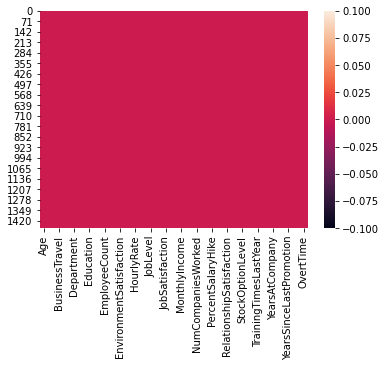

In [25]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [26]:
dfcor=df.corr()
dfcor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OvertTime
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.028062
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.246118
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.016543
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.009135
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.007481
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.025514
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.020322
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.002259
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.024037


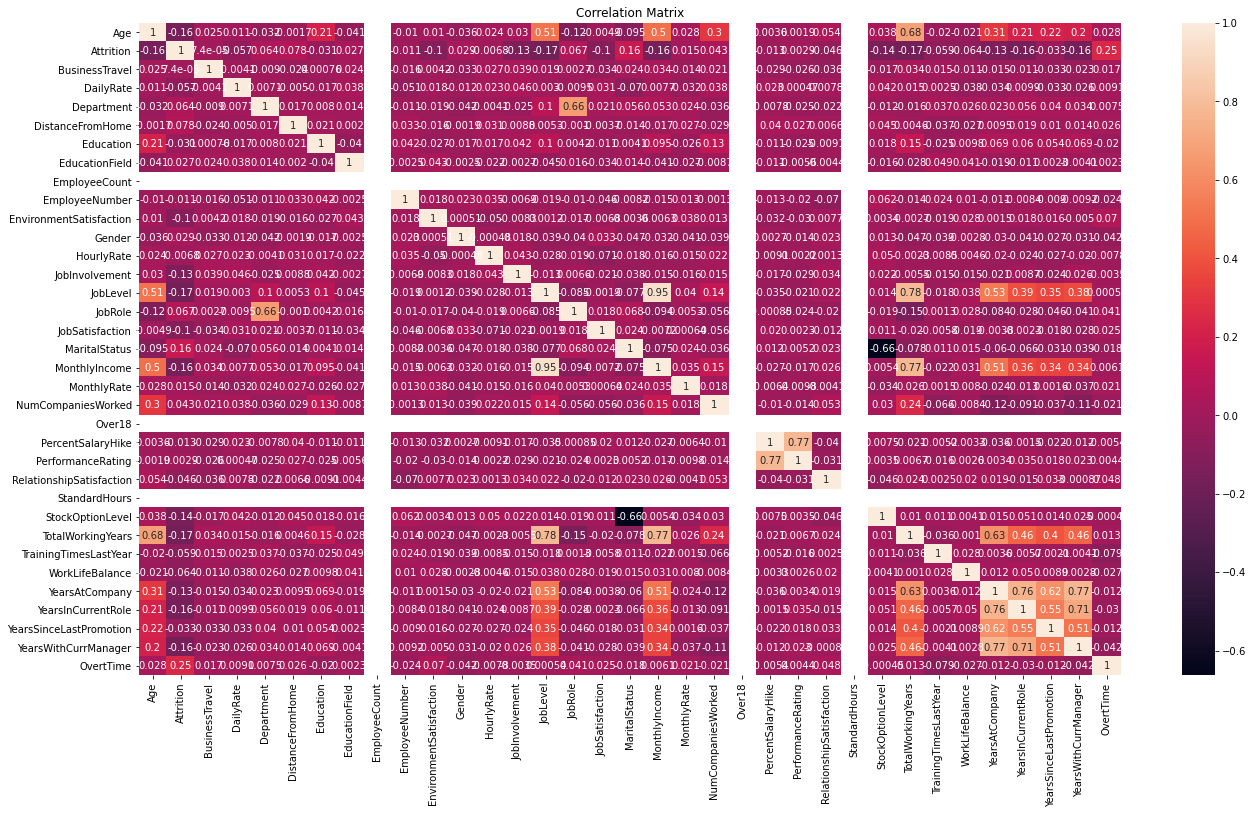

In [27]:
plt.figure(figsize=[22,12])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

StockOptionlevel and MaritalStatus are negatively correlated to each other

PercentSalaryHike and PerformanceRating are positively correlated to each other

Joblevel and YearsinCurrentRole are highly correlated with each other

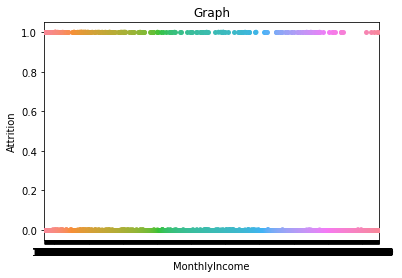

In [28]:
ax=sns.swarmplot(x='MonthlyIncome',y='Attrition',data=df)
plt.title('Graph')
plt.show()

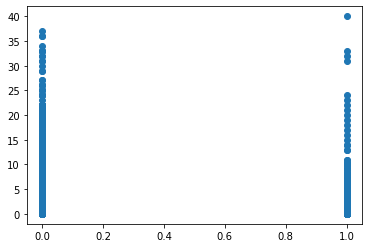

In [29]:
plt.scatter(df['Attrition'],df['YearsAtCompany'])

The scatter plot stating the relation of Attrition and Employee working  years at company

Age                            AxesSubplot(0.125,0.749828;0.065678x0.130172)
Attrition                   AxesSubplot(0.203814,0.749828;0.065678x0.130172)
BusinessTravel              AxesSubplot(0.282627,0.749828;0.065678x0.130172)
DailyRate                   AxesSubplot(0.361441,0.749828;0.065678x0.130172)
Department                  AxesSubplot(0.440254,0.749828;0.065678x0.130172)
DistanceFromHome            AxesSubplot(0.519068,0.749828;0.065678x0.130172)
Education                   AxesSubplot(0.597881,0.749828;0.065678x0.130172)
EducationField              AxesSubplot(0.676695,0.749828;0.065678x0.130172)
EmployeeCount               AxesSubplot(0.755508,0.749828;0.065678x0.130172)
EmployeeNumber              AxesSubplot(0.834322,0.749828;0.065678x0.130172)
EnvironmentSatisfaction        AxesSubplot(0.125,0.593621;0.065678x0.130172)
Gender                      AxesSubplot(0.203814,0.593621;0.065678x0.130172)
HourlyRate                  AxesSubplot(0.282627,0.593621;0.065678x0.130172)

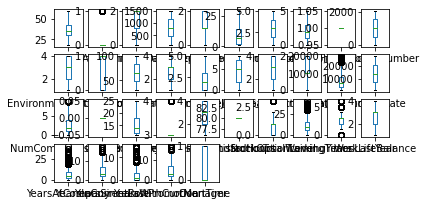

In [30]:
df.plot(kind='box',subplots=True, layout=(5,10))

There are few outliers

In [31]:
collist=df.columns.values
ncol=35
nrows=11

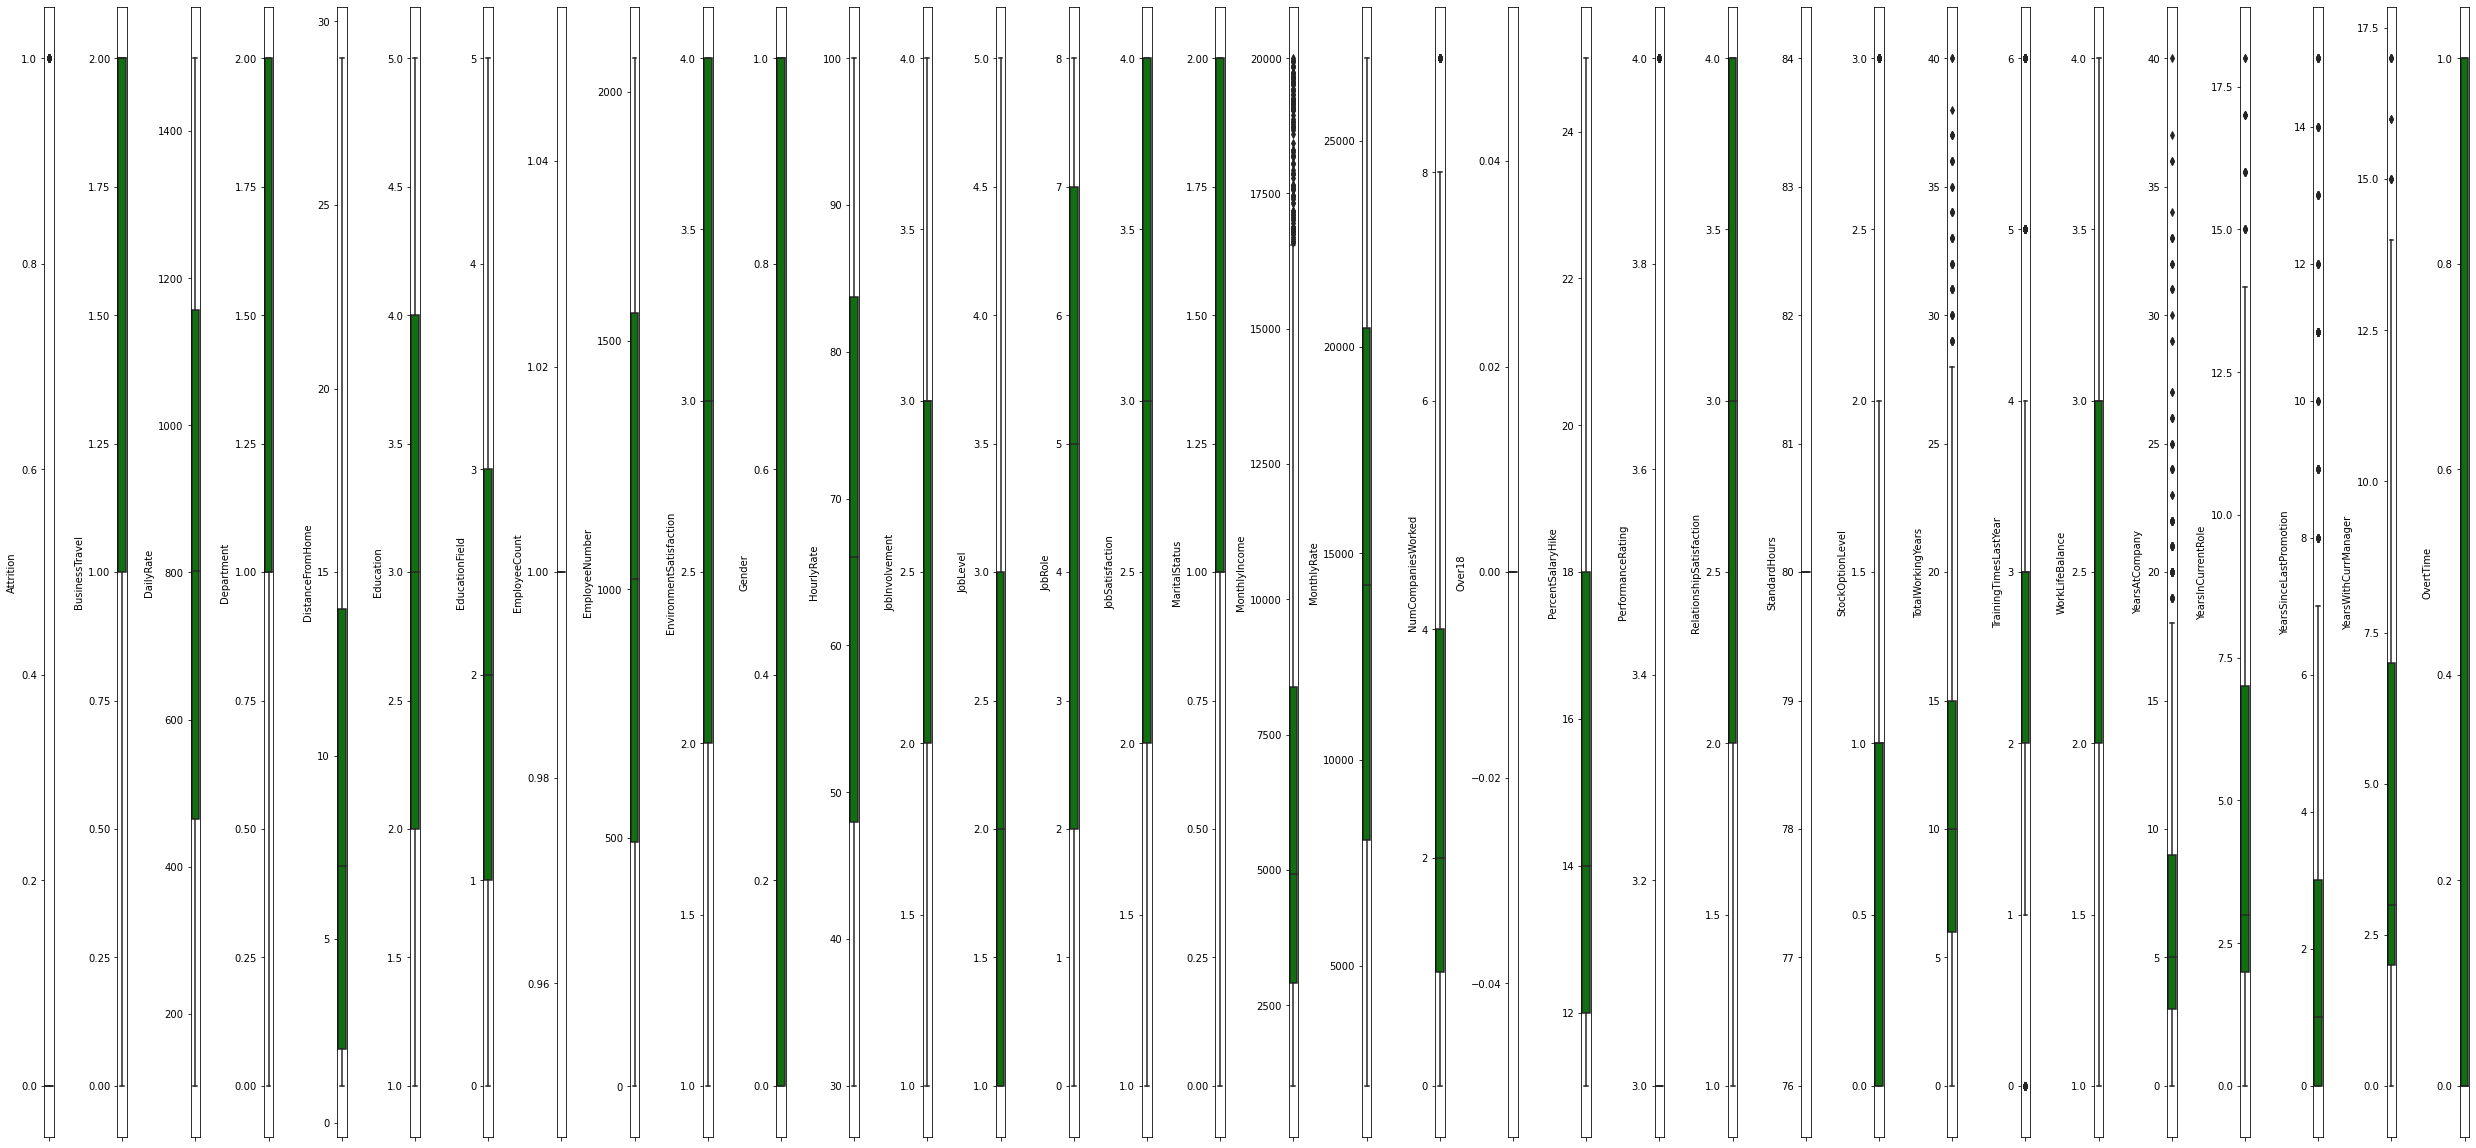

In [32]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [33]:
x=df.drop("Attrition",axis=1)

In [34]:
y=df["Attrition"]

In [35]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [36]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [37]:
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeCount               0.000000
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
Over18                      0.000000
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
T

Skewness Removed

In [38]:
x=df_new

Checking Outliers using boxplot

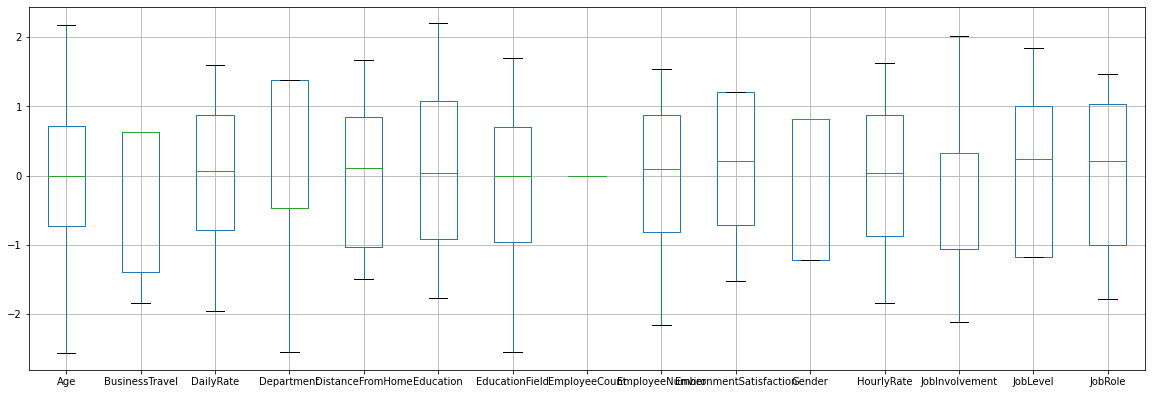

In [39]:
x.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

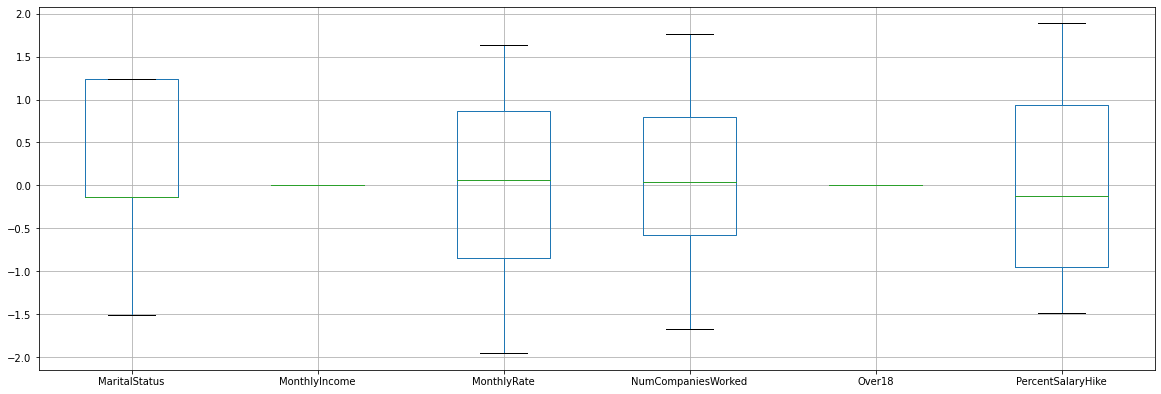

In [40]:
x.iloc[:,16:22].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

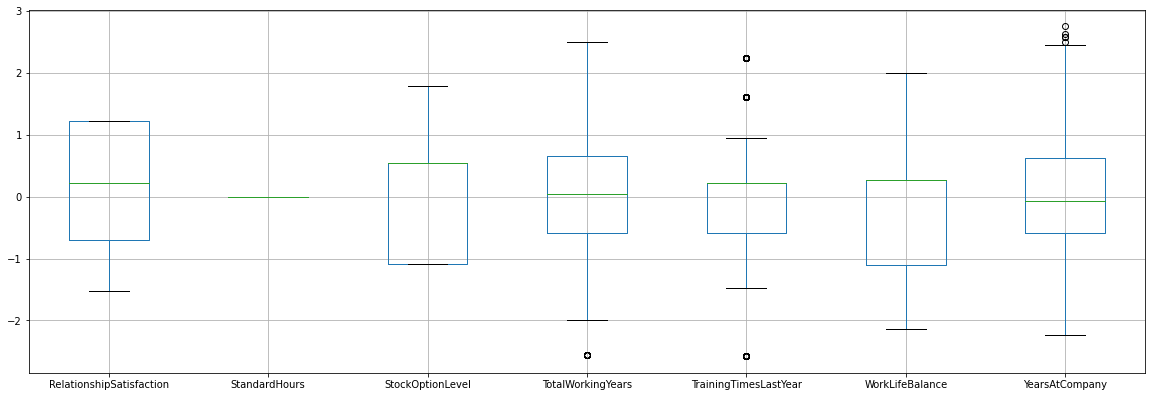

In [41]:
x.iloc[:,23:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in YearsAT Company and TrainingTimesLastYear

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[0.52213976, 0.63546836, 0.7592893 , ..., 1.09486169, 0.49014719,
        1.59174553],
       [1.27641097, 1.39286498, 1.33459724, ..., 0.09685415, 0.90963491,
        0.62824112],
       [0.10209148, 0.63546836, 1.34036452, ..., 1.09486169, 1.55015588,
        1.59174553],
       ...,
       [1.12375507, 0.63546836, 1.75171312, ..., 1.09486169, 0.05300033,
        1.59174553],
       [1.27641097, 1.39286498, 0.58323545, ..., 1.09486169, 1.09011007,
        0.62824112],
       [0.23618832, 0.63546836, 0.35884464, ..., 0.09685415, 0.40688122,
        0.62824112]])

In [43]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


## Finding the best Random_State

In [44]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.9160997732426304  on Random_state 123


## Creating train-test split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=123)

In [46]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [47]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.8390022675736961
[[339  45]
 [ 26  31]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       384
           1       0.41      0.54      0.47        57

    accuracy                           0.84       441
   macro avg       0.67      0.71      0.69       441
weighted avg       0.86      0.84      0.85       441



Accuracy_score of SVC() is :
0.8979591836734694
[[380   4]
 [ 41  16]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.80      0.28      0.42        57

    accuracy                           0.90       441
   macro avg       0.85      0.64      0.68       441
weighted avg       0.89      0.90      0.88       441



Accuracy_score of DecisionTreeClassifier() is :
0.7437641723356009
[[311  73]
 [ 40  17]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     

Logistic Regression has highest accuracy compared to others

## Cross validation

In [48]:
svr=SVC()

In [49]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.864625850340136


In [52]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(svrscores.mean())

0.864625850340136


In [53]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.864625850340136


In [54]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.7625850340136054


In [55]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.8564625850340135


In [56]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.8721088435374149


Cross validation scores can be observed

Minimum difference in accuracy_score and cross validation is for KNeighbors Classifiers(2)

## Hyper parameter Tunning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [59]:
parameters= {'n_neighbors':np.arange(2,15),
            'weights':['uniform','distance']}

In [60]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [62]:
GCV.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [63]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [64]:
accuracy_score(y_test,GCV_pred)

0.8866213151927438

## Saving the best Model

In [65]:
import joblib
joblib.dump(GCV.best_estimator_,"AttritioninHR.pkl")

['AttritioninHR.pkl']